Areal recharge between an impermeable boundary and a river:
    Sand and gravels overlying glacial silt. 
    Bounded beneath and north agianst glacial till (0.00864m/day)
    S&G is on average 7m thick, 8.64m/day, and porosity 0.30
    Land surface is roughly 42mAOD.

In [9]:
# rough calcs
r = 1.200 * 0.30
print(r)

0.36


In [285]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

In [289]:
# parameters
L = 400 # aquifer length, m
H = 7.5 # aquifer thickness, m
zb = -35.00 # aquifer bottom, m
k = 100 # hydraulic conductivity, m/d
T = k * H # transmissivity, m^2/d
hL = 40 # specified head at the right boundary, m
N = 0.050  # areal recharge, m/d

In [290]:
# solution
x = np.linspace(0, L, 100)
h = -N / (2 * T) * (x ** 2 - L ** 2) + hL
Qx = N * x

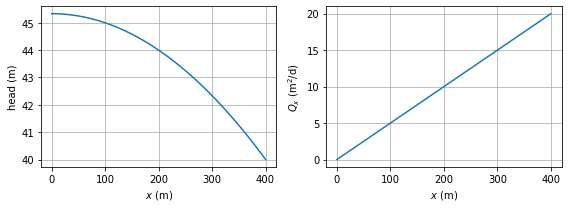

In [291]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

In [279]:
# additional parameters
hR = 41 # water level in river, m
c = 0.864 # hydraulic resistance of river bed, d

In [280]:
# solution
x = np.linspace(0, L, 100)
C = H / c
hL = N * L / C + hR
h = -N / (2 * T) * (x ** 2 - L ** 2) + hL
Qx = N * x

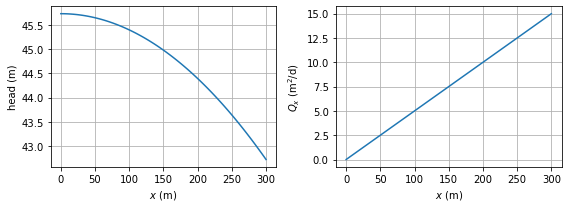

In [281]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

Flow through two zones of different transmissivities - on the horizontal

In [282]:
# parameters
h0 = 42 # specified head at the left boundary, m
hL = 41 # specified head at the right boundary, m
L0 = 200 # length of zone 0, m
L1 = 400 # length of zone 1, m
T0 = 8.64 # transmissivity of zone 1, m^2/d = 0.864m/day x 39.5m (thick)
T1 = 750 # transmissivity of zone 0, m^2/d = 100m/day x 7.5m (thick)
L = L0 + L1 # total length, m

In [283]:
# solution
x = np.linspace(0, L, 101)
h = np.empty_like(x)
h[x < L0] = T1 * L / (T0 * L1 + T1 * L0) * (hL - h0) * x[x < L0] / L + h0
h[x >= L0] = T0 * L / (T0 * L1 + T1 * L0) * (hL - h0) * (x[x >= L0] - L) / L + hL
Qx = -T0 * T1 * L / (T0 * L1 + T1 * L0) * (hL - h0) / L 
hhalfway = h[50]
print(f'head halfway: {hhalfway:.2f} m')
print(f'head gradient zone 0: {(hhalfway - h0) / L0: .6f}')
print(f'head gradient zone 1: {(hL - hhalfway) / L1: .6f}')

head halfway: 41.02 m
head gradient zone 0: -0.004916
head gradient zone 1: -0.000042


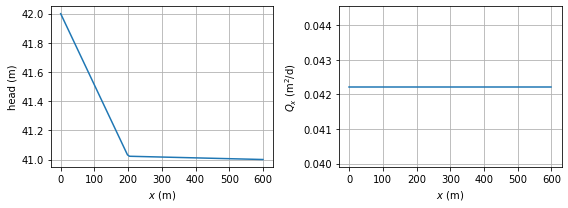

In [284]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot([0, L], [Qx, Qx])
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

In [204]:
print(f'arithmetic mean transmissivity: {(T0 + T1) / 2: .1f} m^2/d')
print(f'effective transmissivity: {L / (L1 / T1 + L0 / T0): .1f} m^2/d')

arithmetic mean transmissivity:  379.3 m^2/d
effective transmissivity:  25.3 m^2/d


Flow from a aquifer to a drained area:
    i.e., galcial sediments to limstone aquifer, via weathered-to-clay limestone layer.

In [219]:
# parameters
hstar = 42 # head above leaky layer, m
h0 = 43 # specified head at the left boundary, m
k = 0.300 # hydraulic conductivity, m/d
H = 44 # aquifer thickness, m
c = 100 # resistance of leaky layer, d
T = k * H # transmissivity, m^2/d
lab = np.sqrt(c * T) # leakage factor, m
print(f'the leakage factor is: {lab:.0f} m')

the leakage factor is: 36 m


In [220]:
# solution
def head(x):
    return (h0 - hstar) * np.exp(-x / lab) + hstar

def disvec(x):
    return k * H * (h0 - hstar) / lab * np.exp(-x / lab)

x = np.linspace(0, 5 * lab, 100)
h = head(x)
Qx = disvec(x)

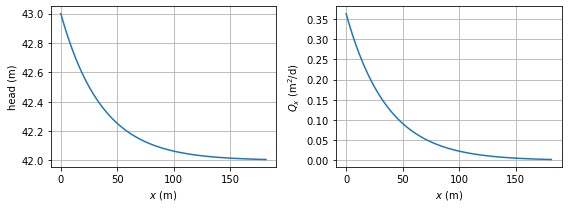

In [221]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

Flow to a river of finite width.

In [260]:
# parameters
k = 10 # hydraulic conductivity, m/d
H = 7.5 # aquifer thickness, m
hstar = 1 # head in river 
L = 5 # half width of river
c = 200 # resistance of leaky river bed, d
UL = 0.0300 # Qx in left aquifer
UR = 0.300 # Qx in right aquifer
T = k * H # transmissivity, m^2/d
lab = np.sqrt(T * c) # leakage factor of aquifer below river
print(f'leakage factor: {lab:.0f} m')

leakage factor: 122 m


In [261]:
x = np.linspace(-300, 300, 100)
A = -lab * (UL + UR) / (2 * T) / np.cosh(L / lab)
B =  lab * (UL - UR) / (2 * T) / np.sinh(L / lab)
h0 = A * np.sinh(-L / lab) + B * np.cosh(-L / lab) + hstar
h1 = A * np.sinh(L / lab) + B * np.cosh(L / lab) + hstar
h = np.zeros(len(x))
h[x <= -L] = -UL / T * (x[x <= -L] + L) + h0
h[x >= L]  = -UR / T * (x[x >= L] - L) + h1
h[np.abs(x) < L] = A * np.sinh(x[np.abs(x) < L] / lab) + \
                   B * np.cosh(x[np.abs(x) < L] / lab) + hstar
Qx = np.zeros(len(x))
Qx[x <= 0] = UL
Qx[x >= L] = UR
Qx[np.abs(x) < L] = -A * T / lab * np.cosh(x[np.abs(x) < L] / lab) - \
                     B * T / lab * np.sinh(x[np.abs(x) < L] / lab)

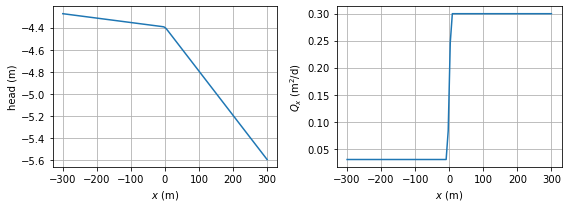

In [262]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)');

In [263]:
# solution
psi = np.zeros((2, len(x)))
psi[1] = -Qx
xg = x
zg = [0, H]

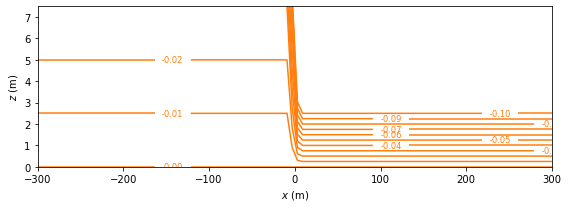

In [264]:
# basic streamline plot
cs = plt.contour(xg, zg, psi, np.arange(-0.1, 0.05, 0.01), colors='C1', linestyles='-')
plt.clabel(cs, fmt='%1.2f', fontsize='smaller')
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

Flow to a river in a two-aquifer system

In [ ]:
# parameters
k0 = 10 # hydraulic conductivity aquifer 0, m/d
k1 = 0.864 # hydraulic conductivity aquifer 1, m/d
H0 = 7.5 # thickness aquifer 0, m
H1 = 48.5 # thickness aquifer 1, m
Hstar = 2 # thickness leaky layer
kstar = 0.01 # hydraulic conductivity leaky layer, m/d
hr = 5 # head in river, m
GL = -0.002 # head gradient far away to the left, -
GR = 0.0005 # head gradient far away to the right, -